# Practice Session 05: Network models


Author: <font color="white">Mario Muñoz Serrano</font>

E-mail: <font color="white">mario.munoz01@estudiant.upf.edu</font>

Date: <font color="white">12-11-2020</font>

# 1. Random (ER) graph generator

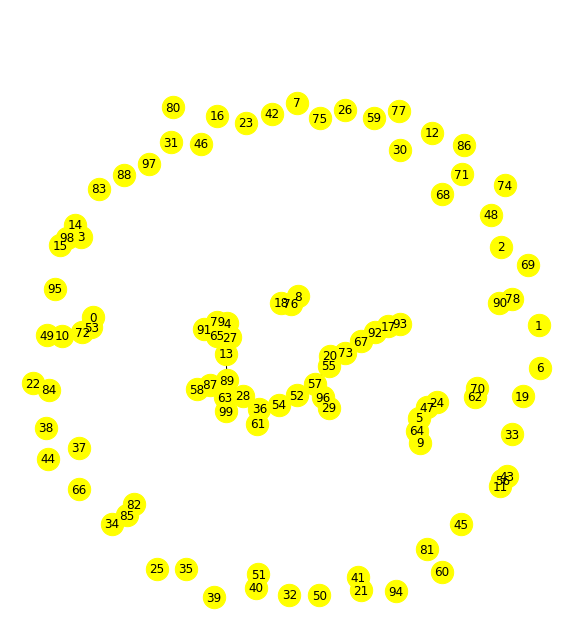

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict

#We use the function bernoulli trial in order to know if an edge has to be included in the graph or not
def bernoulli_trial(p):
    if np.random.random() < p:
        return True
    else:
        return False

# Here we generate the graph with a N-1 number of nodes cause the function n goes from a to b-1 in our case 0 to N-1
# And the edges are added randomly with a certain probability p using the bernoulli trial function
def generate_random_graph(N, p):
    net = nx.Graph()
    net.add_nodes_from(range(0, N))
    for i in net:
        for j in net:
            if i != j:
                if bernoulli_trial(p):
                    net.add_edge(i, j)
    return net

# Here we use this function to add the diferent graphs to a a matplotlib object
def plot_network(net, title, node_size, color, window_height, window_width):
    plot = plt.figure(figsize=(window_width, window_height))
    plot.suptitle(title, color= "white")
    plt.axis('off')
    pos = nx.spring_layout(net)
    nx.draw_networkx(net, pos, with_labels=True, node_size=node_size, node_color=color)
    plt.draw()



net1 = generate_random_graph(100, 0.005)
net2 = generate_random_graph(100, 0.01)
net3 = generate_random_graph(100, 0.02)


plot_network(net1, "Network 1: with 100 nodes and edge probability p = 0.005", 500, 'yellow', 10, 10)
plot_network(net2,"Network 2: with 100 nodes and edge probability p = 0.01", 500, 'yellow', 10, 10)
plot_network(net3,"Network 3: with 100 nodes and edge probability p = 0.02", 500, 'yellow', 10, 10)

#And finally we display them below
plt.show()

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict


def bernoulli_trial(p):
    if np.random.random() < p:
        return True
    else:
        return False


def generate_random_graph(N, p):
    net = nx.Graph()
    net.add_nodes_from(range(0, N))
    for i in net:
        for j in net:
            if i != j:
                if bernoulli_trial(p):
                    net.add_edge(i, j)
    return net






def print_er_statistics(g, p, name):
    sum = 0
    for i in g:
        sum += g.degree(i)

    average_degree = sum / len(g.nodes())
    # The formula of expected average degree is p(N-1) where N is the number of nodes and p is the probability of a
    # link between two nodes (u,v)

    expect_av_degree = p * (len(g.nodes()) - 1)

    text = "Average degree of " + name + " is: " + str(
        average_degree) + "\n" + "The expected average degree of " + name + " network is: " + str(expect_av_degree)
    return text

def plot_network(net, title, node_size, color, window_height, window_width):
    plot = plt.figure(figsize=(window_width, window_height))
    plot.suptitle(title, color="green")
    plt.axis('off')
    pos = nx.spring_layout(net)
    nx.draw_networkx(net, pos, with_labels=True, node_size=node_size, node_color=color)
    plt.draw()


def plot_degree_distribution(g, title, text):
    plot = plt.figure(figsize=(10, 10))
    plot.suptitle(title, color="green")
    plot.text(0.1, 0.92, text, dict(size=12), color="white")
    degree_dict = dict(g.degree())
    degree_ordered = OrderedDict(sorted(degree_dict.items(), key=lambda x: x[1], reverse=True))
    degree_sequence = list(degree_ordered.values())
    prob, bin_edges = np.histogram(degree_sequence, bins=range(1, np.max(degree_sequence) + 2), density=True)
    plt.loglog(bin_edges[:-1], prob, '.', marker='x')
    plt.title("Probability density function")
    plt.xlabel("degree")
    plt.ylabel("probability")
    plt.draw()



def gen_random_graphs_incremental_probability(num_graphs, num_nodes, p_0):
    p = p_0
    count = 0
    for i in range(num_graphs):
        count +=1
        net = generate_random_graph(num_nodes, p)

        title = "Net " + str(count)

        stats = print_er_statistics(net, p, title)

        plot_network(net, title, 500, "green", 10, 10)

        plot_degree_distribution(net, "Relevant information about: " + title, stats)

        p += 0.2



gen_random_graphs_incremental_probability(5, 500, 0.1)


plt.show()

## Generated ER graphs

<font size="+1" color="white">Here when we click run 5 graphs and their statistichal information are displayed, what we see about the effect of incease the probability of a edge is that the probability desnity function turns to the right side, showing that the largers degrees are more probable than the lowers. And the the average degree and the expected average degree also increases as you can see in the relevant information below the plot of every network</font>

# 2. Preferential attachment (BA) generator

In [ ]:
def select_targets(g, m):
    # Check if feasible
    if len(g.nodes()) < m:
        raise ValueError('Graph has less than m nodes')

    # Compute sum of degree
    sum_degree = 0
    # YOUR CODE HERE: COMPUTE SUM OF DEGREE OF NODES
    for i in g:
        sum_degree += g.degree(i)
    if sum_degree == 0:
        raise ValueError('Graph as no edges')

    # Compute probabilities
    probabilities = []
    for u in g.nodes():
        # YOUR CODE HERE: COMPUTE PROBABILITY OF SELECTING NODE u
        # THEN APPEND IT TO probabilities USING probabilities.append(...)
        
        p = g.degree(u) / len(g.nodes())
        
        probabilities.append(p)

    # Sample with replacement
    selected = np.random.choice(g.nodes(), size=m, replace=True, p=probabilities)

    return selected

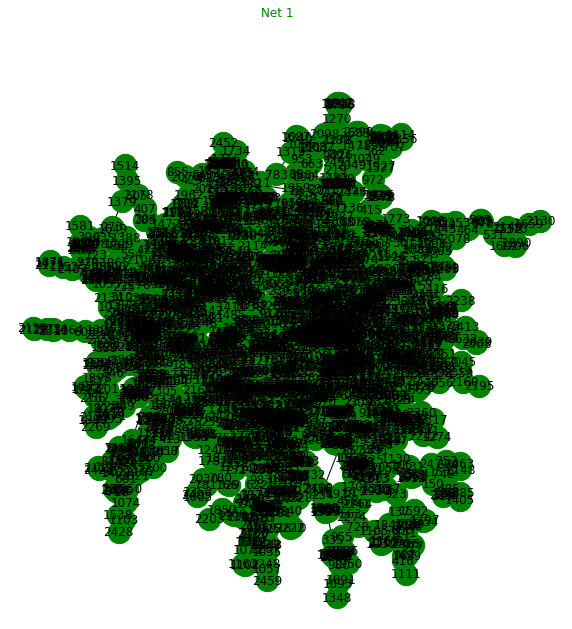

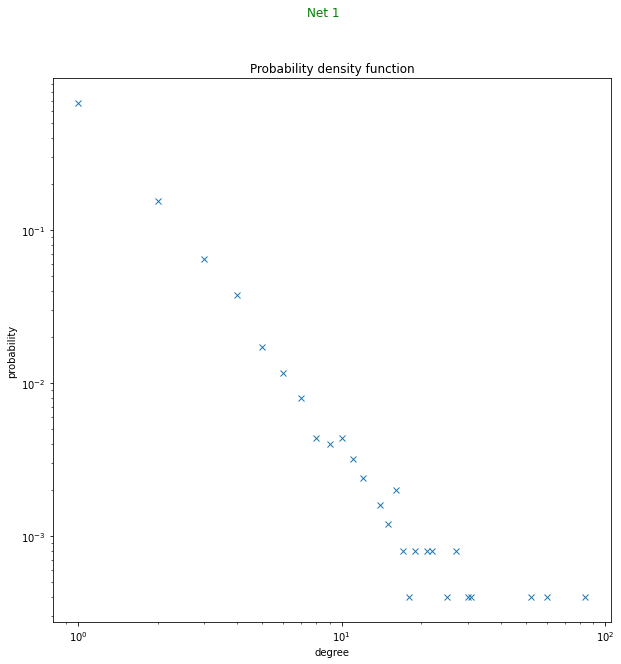

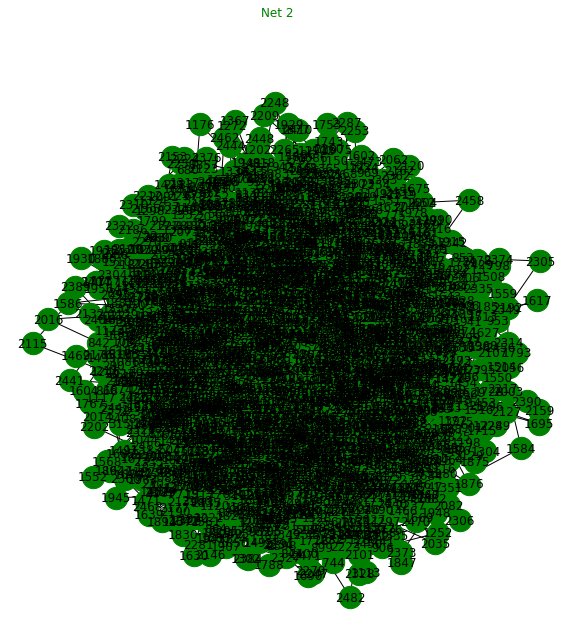

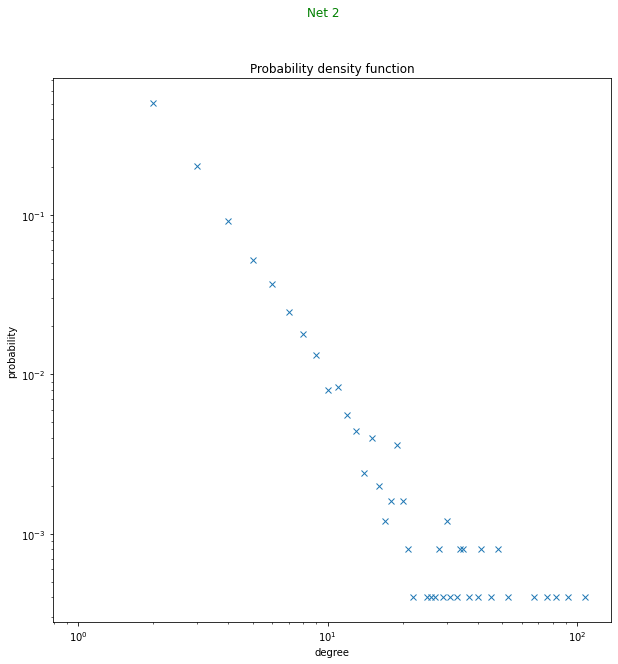

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import OrderedDict


def bernoulli_trial(p):
    if np.random.random() < p:
        return True
    else:
        return False


def generate_random_graph(N, p):
    net = nx.Graph()
    net.add_nodes_from(range(0, N))
    for i in net:
        for j in net:
            if i != j:
                if bernoulli_trial(p):
                    net.add_edge(i, j)
    return net



def select_targets(g, m):
    # Check if feasible
    if len(g.nodes()) < m:
        raise ValueError('Graph has less than m nodes')

    # Compute sum of degree
    sum_degree = 0
    # YOUR CODE HERE: COMPUTE SUM OF DEGREE OF NODES
    for i in g:
        sum_degree += g.degree(i)
    if sum_degree == 0:
        raise ValueError('Graph as no edges')

    # Compute probabilities
    probabilities = []
    for u in g.nodes():
        # YOUR CODE HERE: COMPUTE PROBABILITY OF SELECTING NODE u
        # THEN APPEND IT TO probabilities USING probabilities.append(...)

        p = g.degree(u) / sum_degree

        probabilities.append(p)

    # Sample with replacement
    selected = np.random.choice(g.nodes(), size=m, replace=False, p=probabilities)

    return selected


def generate_preferential_attachment_graph(N, m0, m):
    net = nx.Graph()
    net.add_nodes_from(range(0, m0))
    for i in range(1, m0):
        net.add_edge(0, i)
    for u in range(m0, N):
        targets = select_targets(net, m)
        net.add_node(u)
        for j in targets:
            net.add_edge(u, j)

    return net



def text_er_statistics(g, p, name):
    sum = 0
    for i in g:
        sum += g.degree(i)

    average_degree = sum / len(g.nodes())
    # The formula of expected average degree is p(N-1) where N is the number of nodes and p is the probability of a
    # link between two nodes (u,v)

    expect_av_degree = p * (len(g.nodes()) - 1)

    text = "Average degree of " + name + " network is: " + str(
        average_degree) + "\n" + "The expected average degree of " + name + " network is: " + str(expect_av_degree)
    return text

def plot_network(net, title, node_size, color, window_height, window_width):
    plot = plt.figure(figsize=(window_width, window_height))
    plot.suptitle(title, color="green")
    plt.axis('off')
    pos = nx.spring_layout(net)
    nx.draw_networkx(net, pos, with_labels=True, node_size=node_size, node_color=color)
    plt.draw()


def plot_degree_distribution(g, title, text):
    plot = plt.figure(figsize=(10, 10))
    plot.suptitle(title, color="green")
    plot.text(0.1, 0.95, text, dict(size=12), color="white")
    degree_dict = dict(g.degree())
    degree_ordered = OrderedDict(sorted(degree_dict.items(), key=lambda x: x[1], reverse=True))
    degree_sequence = list(degree_ordered.values())
    prob, bin_edges = np.histogram(degree_sequence, bins=range(1, np.max(degree_sequence) + 2), density=True)
    plt.loglog(bin_edges[:-1], prob, '.', marker='x')
    plt.title("Probability density function")
    plt.xlabel("degree")
    plt.ylabel("probability")
    plt.draw()

def gen_BA_graph():

    net1 = generate_preferential_attachment_graph(2500, 5, 1)

    title1 = "Net " + str(1)

    plot_network(net1, title1, 500, "green", 10, 10)

    plot_degree_distribution(net1, title1, None)


    net2 = generate_preferential_attachment_graph(2500, 2, 2)

    title2 = "Net " + str(2)

    plot_network(net2, title2, 500, "green", 10, 10)

    plot_degree_distribution(net2, title2, None)



gen_BA_graph()



plt.show()


## Generated BA graphs

<font size="+1" color="white">Here when we click run two graphs and their pdf are shown, now as we see in the pdf distribution the probability tends to be aprox -log(log(x)) where x is the degree of the node .</font>

<font size="+2" color="#003300">I hereby declare that, except for the code provided by the course instructors, all of my code, report, and figures were produced by myself.</font>